# Predicting Stock Prices of FACEBOOK

## In this data project we will focus on exploratory data analysis of stock prices.

 Processing could include removing unknown values from the data or replacing unknown values with values which make sense, maybe 0. Analysing the data could include finding out the trend of a stock price, e.g. how the stock price changes .

## Here, i am doing the Exploratory Data analysis on the historical data of the company FACEBBOK

In [46]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import requests
url="https://raw.githubusercontent.com/Technocolabs100/Predicting-stock-prices-for-large-cap-technology-companies-DS-II/main/Datasets%20of%20Stocks%20Market%20and%20Stock%20News%20Articles/NASDAQ%20Datasets/Nasdaq%20Stocks/HistoricalData_FB.csv?token=AK6IVGXQZEA5DM2ODI3OHIDA43PAO"
data=requests.get(url).content
data

b'Date,Close/Last,Volume,Open,High,Low\r\n06/09/2021,$330.25,13727950,$335.74,$336.8,$330\r\n06/08/2021,$333.68,14580460,$336.7,$338.2999,$332.24\r\n06/07/2021,$336.58,20136710,$329.48,$337.69,$328.93\r\n06/04/2021,$330.35,13289380,$325.9,$332.455,$325.18\r\n06/03/2021,$326.04,12610790,$325.78,$327.375,$323.48\r\n06/02/2021,$329.15,11654280,$330.38,$331.87,$327.1215\r\n06/01/2021,$329.13,11765910,$330.15,$331.42,$326.64\r\n05/28/2021,$328.73,12037430,$331,$332.8684,$328.33\r\n05/27/2021,$332.75,20477730,$328,$333.78,$326.76\r\n05/26/2021,$327.66,9686917,$328.35,$329.8299,$325.82\r\n05/25/2021,$327.79,16436970,$327.08,$329.18,$324.8\r\n05/24/2021,$324.63,16445360,$318.21,$325.95,$318.03\r\n05/21/2021,$316.23,13600900,$319.29,$319.93,$315.8101\r\n05/20/2021,$318.61,17320240,$313.58,$319.25,$313.16\r\n05/19/2021,$313.59,19106240,$304.185,$314.66,$303.57\r\n05/18/2021,$309.96,14522400,$315.59,$316.5,$309.81\r\n05/17/2021,$315.46,15371050,$313.55,$315.68,$311.58\r\n05/14/2021,$315.94,192457

In [47]:
sdata = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [48]:
sdata.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$330.25,13727950,$335.74,$336.8,$330
1,06/08/2021,$333.68,14580460,$336.7,$338.2999,$332.24
2,06/07/2021,$336.58,20136710,$329.48,$337.69,$328.93
3,06/04/2021,$330.35,13289380,$325.9,$332.455,$325.18
4,06/03/2021,$326.04,12610790,$325.78,$327.375,$323.48


**Open ->** *means the price at which a stock started trading when the opening bell rang.*

**Close->** *refers to the price of an individual stock when the stock exchange closed shop for the day. It represents the last buy-sell order executed between two traders.*

**High ->** *is the highest price at which a stock traded during a period.*

**Low  ->** *is the lowest price of the period. A stock’s high and low points for the day are often called it’s intraday high and  low.*


In [49]:
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [50]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$330.25,13727950,$335.74,$336.8,$330
1,06/08/2021,$333.68,14580460,$336.7,$338.2999,$332.24
2,06/07/2021,$336.58,20136710,$329.48,$337.69,$328.93
3,06/04/2021,$330.35,13289380,$325.9,$332.455,$325.18
4,06/03/2021,$326.04,12610790,$325.78,$327.375,$323.48


### Saving the Raw data

In [51]:
df.to_csv('data.csv')

### Now let's start our Analysis!!!

Checking if the data type of the date column and then converting it into proper datetime format.

In [52]:
df.dtypes['Date']

dtype('O')

In [53]:
df['Date']=pd.to_datetime(df['Date'])

In [54]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$330.25,13727950,$335.74,$336.8,$330
1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24
2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48


### Checking for missing values

In [55]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [56]:
df.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2279 non-null   datetime64[ns]
 1   Close/Last  2279 non-null   object        
 2   Volume      2279 non-null   int64         
 3   Open        2279 non-null   object        
 4   High        2279 non-null   object        
 5   Low         2279 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 107.0+ KB


In [58]:
df.describe()

,Volume
count,2.279000e+03
mean,3.136689e+07
std,2.794498e+07
min,5.913066e+06
25%,1.605359e+07
50%,2.285524e+07
75%,3.646476e+07
max,5.793775e+08


### Check whether csv file has data on more than one category.

checking for the ‘Date’ column will have repeating values.

In [59]:


# Categories in Date
df.Date.unique()

array(['2021-06-09T00:00:00.000000000', '2021-06-08T00:00:00.000000000',
       '2021-06-07T00:00:00.000000000', ...,
       '2012-05-22T00:00:00.000000000', '2012-05-21T00:00:00.000000000',
       '2012-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [60]:
df.rename(columns = str.upper , inplace = True)

In [61]:
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,2021-06-09,$330.25,13727950,$335.74,$336.8,$330
1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24
2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48


In [62]:
df.shape

(2279, 6)

### Checking for Duplicated datasets

In [65]:
df[df.duplicated()] 

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW


#### It will show total days between maximum and minimum of Date column.

In [67]:
df.DATE.max()-df.DATE.min()

Timedelta('3309 days 00:00:00')

### Column datatype conversion

In [70]:
df['HIGH'] = df['HIGH'].str.replace('$', '')
df['LOW'] = df['LOW'].str.replace('$', '')
df['OPEN'] = df['OPEN'].str.replace('$', '')
df['CLOSE/LAST'] = df['CLOSE/LAST'].str.replace('$', '')

<ipython-input-70-fddd982f98c7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['HIGH'] = df['HIGH'].str.replace('$', '')
<ipython-input-70-fddd982f98c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['LOW'] = df['LOW'].str.replace('$', '')
<ipython-input-70-fddd982f98c7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['OPEN'] = df['OPEN'].str.replace('$', '')
<ipython-input-70-fddd982f98c7>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single char

### EXPLORATORY DATA ANALYSIS

In [71]:
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,2021-06-09,330.25,13727950,335.74,336.8,330
1,2021-06-08,333.68,14580460,336.7,338.2999,332.24
2,2021-06-07,336.58,20136710,329.48,337.69,328.93
3,2021-06-04,330.35,13289380,325.9,332.455,325.18
4,2021-06-03,326.04,12610790,325.78,327.375,323.48


In [72]:
df['HIGH']=pd.to_numeric(df['HIGH'])
df['LOW']=pd.to_numeric(df['LOW'])
df['OPEN']=pd.to_numeric(df['OPEN'])
df['CLOSE/LAST']=pd.to_numeric(df['CLOSE/LAST'])

(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

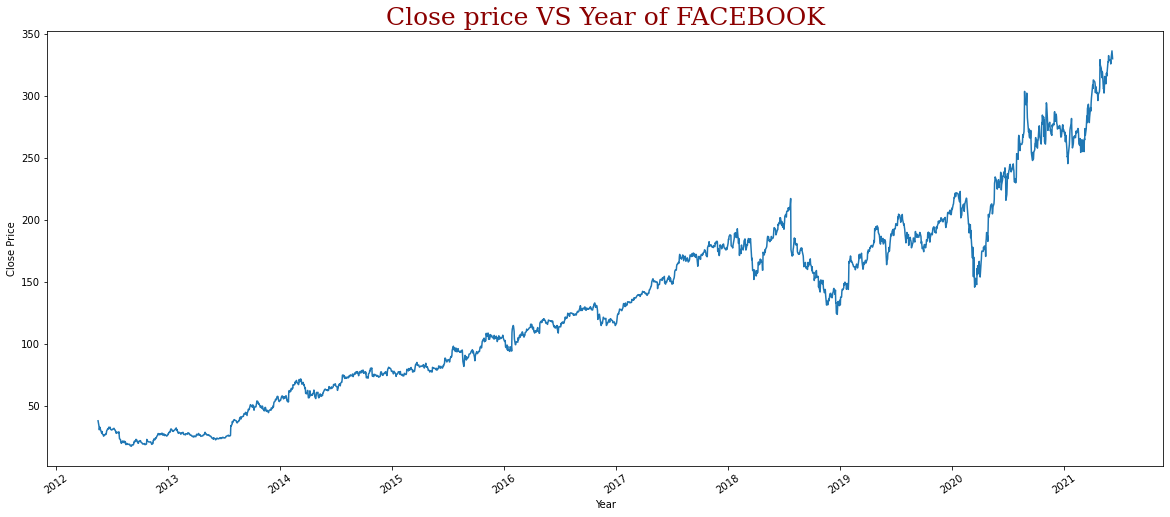

In [89]:
plt.figure(figsize=(20,8))
plt.plot('DATE','CLOSE/LAST',data=df)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close price VS Year of FACEBOOK',fontdict={'family':'serif','color':'darkred','size':25})
plt.xticks(rotation=35)

[]

<Figure size 1440x576 with 0 Axes>

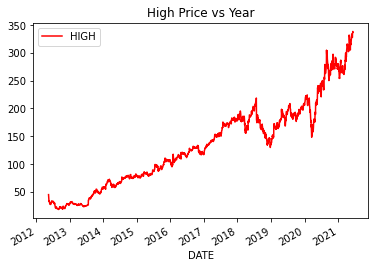

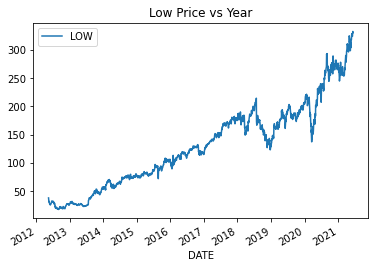

In [90]:
plt.figure(figsize=(20,8))
df['HIGH']=pd.to_numeric(df['HIGH'])
df['LOW']=pd.to_numeric(df['LOW'])

ax1=df.plot(x='DATE',y='HIGH',style=['-'],color='red')
ax2=df.plot(x='DATE',y='LOW',style=['-'])
ax1.set_title("High Price vs Year")
ax2.set_title("Low Price vs Year")
ax1.legend()
ax2.legend()
plt.plot()

<Figure size 2160x1080 with 0 Axes>

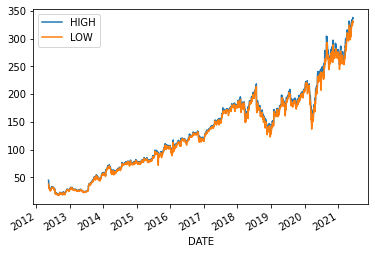

In [102]:
plt.figure(figsize=(30,15))

df.plot(x='DATE',y=['HIGH','LOW'])
plt.legend()
plt.show()

In [ ]:
df.xs(key = 'Close',axis=1,level='Stock Info').plot(figsize = (14,4))
plt.show()

First, we will create the column ‘daily lag’ which is basically just shifting the ‘Close’ price by one day back.

In [105]:
df['DAILY LAG'] = df['CLOSE/LAST'].shift(1)
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,DAILY LAG
0,2021-06-09,330.25,13727950,335.74,336.8000,330.00,NaN
1,2021-06-08,333.68,14580460,336.70,338.2999,332.24,330.25
2,2021-06-07,336.58,20136710,329.48,337.6900,328.93,333.68
3,2021-06-04,330.35,13289380,325.90,332.4550,325.18,336.58
4,2021-06-03,326.04,12610790,325.78,327.3750,323.48,330.35


#### The reason for creating the ‘Daily Lag’ is to allow us to create the column ‘Daily Returns’

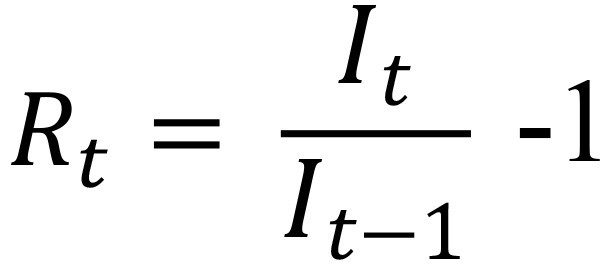

Daily returns tells us the returns that we obtain in a day after the stock price closes 

In [106]:
df['DAILY RETURNS'] = (df['DAILY LAG']/df['CLOSE/LAST']) -1
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,DAILY LAG,DAILY RETURNS
0,2021-06-09,330.25,13727950,335.74,336.8000,330.00,NaN,NaN
1,2021-06-08,333.68,14580460,336.70,338.2999,332.24,330.25,-0.010279
2,2021-06-07,336.58,20136710,329.48,337.6900,328.93,333.68,-0.008616
3,2021-06-04,330.35,13289380,325.90,332.4550,325.18,336.58,0.018859
4,2021-06-03,326.04,12610790,325.78,327.3750,323.48,330.35,0.013219


<AxesSubplot:>

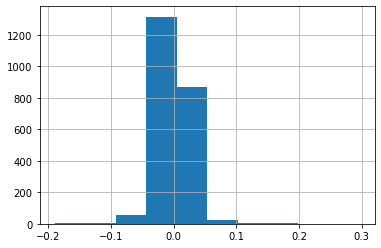

In [107]:
df['DAILY RETURNS'].hist()

#### Finding the mean and standard deviation

In [113]:
df['DAILY RETURNS']=pd.to_numeric(df['DAILY RETURNS'])
mean =df['DAILY RETURNS'].mean()
std = df['DAILY RETURNS'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.0012178200668087342
Std deviation = 0.023405994171200935


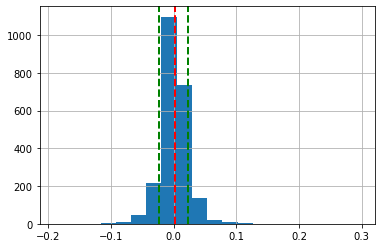

In [115]:
##It is hard to tell the shape if we use the default bin=10. Let us increase it to 20. 


df['DAILY RETURNS'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

#### Plotting the Volume

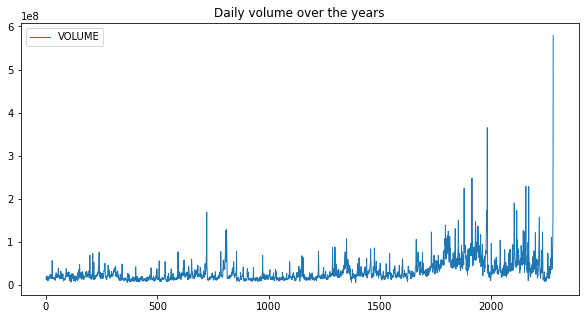

In [119]:
df.plot(y="VOLUME", title="Daily volume over the years", linewidth=1, figsize=(10,5))
# plt.xlabel("Date")
plt.show()

In [118]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df.DATE,
                    y=df.VOLUME,
                    name = "VOLUME VS TIME",
                    line = dict(color = 'green'),
                    opacity = 0.4)

layout = dict(title='VOLUME VS TIME',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [120]:
df['YEARS'] = df['DATE'].dt.year  ###EXTRACTING THE YEARS

In [121]:
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,DAILY LAG,DAILY RETURNS,YEARS
0,2021-06-09,330.25,13727950,335.74,336.8000,330.00,NaN,NaN,2021
1,2021-06-08,333.68,14580460,336.70,338.2999,332.24,330.25,-0.010279,2021
2,2021-06-07,336.58,20136710,329.48,337.6900,328.93,333.68,-0.008616,2021
3,2021-06-04,330.35,13289380,325.90,332.4550,325.18,336.58,0.018859,2021
4,2021-06-03,326.04,12610790,325.78,327.3750,323.48,330.35,0.013219,2021


In [122]:
df1 = df.set_index('YEARS')

### PLOTTING THE DATA

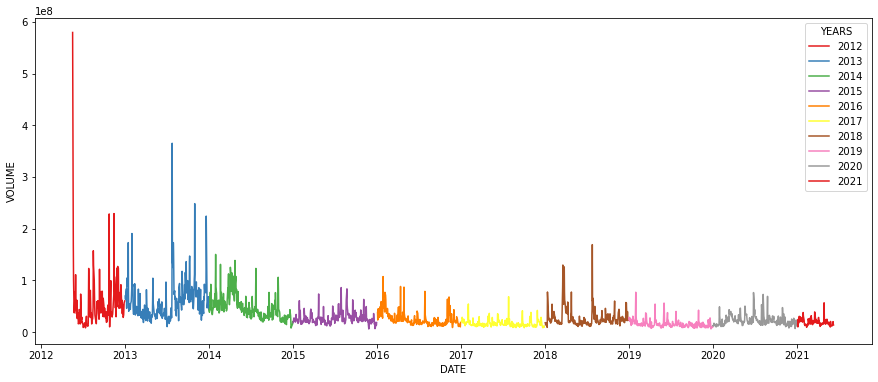

In [124]:
plt.figure(figsize=(15,6))
sns.lineplot(x='DATE',y='VOLUME',data=df,hue='YEARS',palette='Set1')
plt.show()

In [125]:
df_year = df[['VOLUME','DATE']].groupby(by='DATE').sum().reset_index()
df_year


,DATE,VOLUME
0,2012-05-18,579377500
1,2012-05-21,167943600
2,2012-05-22,101667700
3,2012-05-23,73541150
4,2012-05-24,50208760
...,...,...
2274,2021-06-03,12610790
2275,2021-06-04,13289380
2276,2021-06-07,20136710
2277,2021-06-08,14580460


In [129]:
df.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,DAILY LAG,DAILY RETURNS,YEARS
0,2021-06-09,330.25,13727950,335.74,336.8000,330.00,NaN,NaN,2021
1,2021-06-08,333.68,14580460,336.70,338.2999,332.24,330.25,-0.010279,2021
2,2021-06-07,336.58,20136710,329.48,337.6900,328.93,333.68,-0.008616,2021
3,2021-06-04,330.35,13289380,325.90,332.4550,325.18,336.58,0.018859,2021
4,2021-06-03,326.04,12610790,325.78,327.3750,323.48,330.35,0.013219,2021


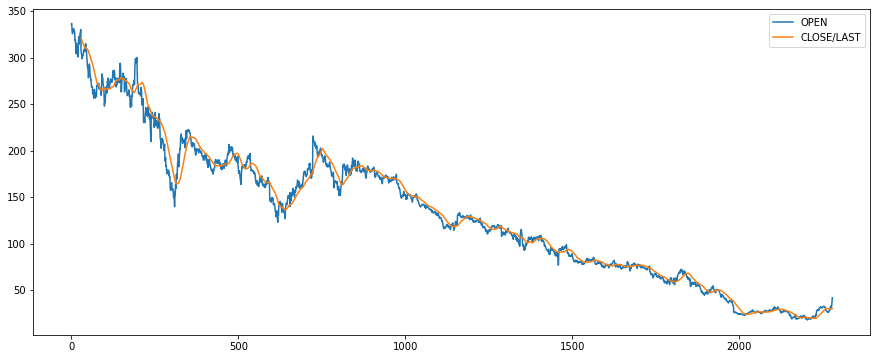

In [133]:
df['OPEN'].plot(figsize=(15,6))
df.rolling(window=30).mean()['CLOSE/LAST'].plot()
plt.legend()

Text(0.5, 1.0, 'Distribution plot of CLOSE')

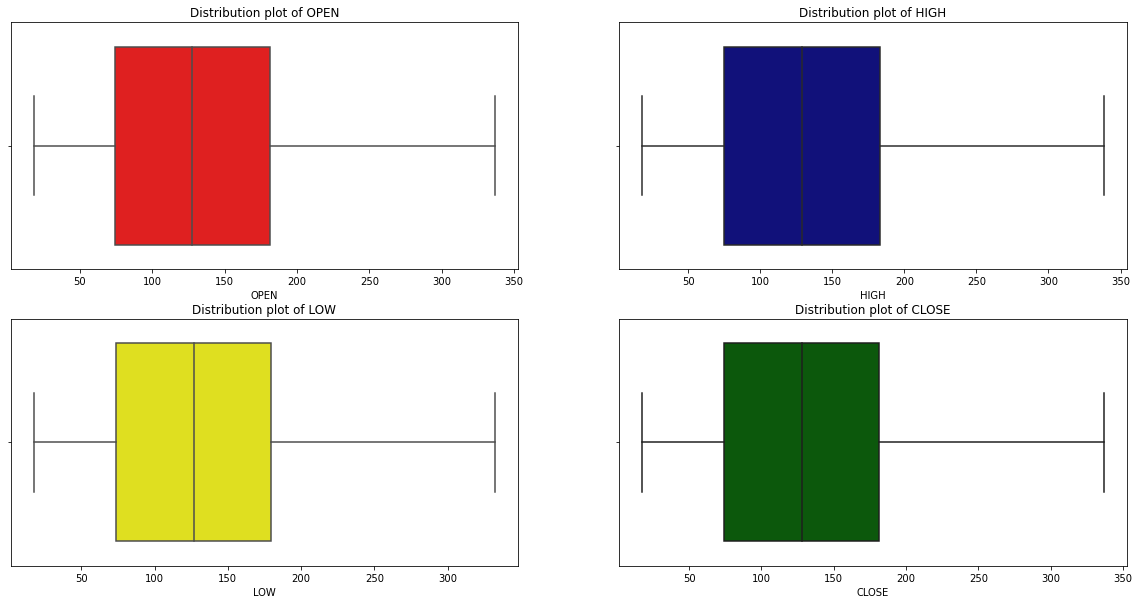

In [135]:
d1=df
plt.figure(figsize=(20,10))         #creating Box plots of various attributes
plt.subplot(2,2,1)

sns.boxplot(x = d1['OPEN'] , color = 'red')
plt.xlabel('OPEN')
plt.title('Distribution plot of OPEN')

plt.subplot(2,2,2)
sns.boxplot(x = d1['HIGH'] , color = 'darkblue')
plt.xlabel('HIGH')
plt.title('Distribution plot of HIGH')

plt.subplot(2,2,3)
sns.boxplot(x = d1['LOW'] , color = 'yellow')
plt.xlabel('LOW')
plt.title('Distribution plot of LOW')

plt.subplot(2,2,4)
sns.boxplot(x = d1['CLOSE/LAST'] , color = 'darkgreen')
plt.xlabel('CLOSE')
plt.title('Distribution plot of CLOSE')